In [1]:
# set up dependencies
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import sklearn.datasets as dta
from scipy.stats import linregress
from pprint import pprint

# read in google play store csv data
GplayStore_csv_path = "Resources/Google-Playstore-Full.csv"

df = pd.read_csv(GplayStore_csv_path)
df

C:\Users\britt\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (2,3,11,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,DoorDash - Food Delivery,FOOD_AND_DRINK,4.548561573,305034,"5,000,000+",Varies with device,0,Everyone,29-Mar-19,Varies with device,Varies with device,NaN,NaN,NaN,NaN
1,TripAdvisor Hotels Flights Restaurants Attract...,TRAVEL_AND_LOCAL,4.400671482,1.20792e+06,"100,000,000+",Varies with device,0,Everyone,29-Mar-19,Varies with device,Varies with device,NaN,NaN,NaN,NaN
2,Peapod,SHOPPING,3.656329393,1967,"100,000+",1.4M,0,Everyone,20-Sep-18,5.0 and up,2.2.0,NaN,NaN,NaN,NaN
3,foodpanda - Local Food Delivery,FOOD_AND_DRINK,4.107232571,389154,"10,000,000+",16M,0,Everyone,22-Mar-19,4.2 and up,4.18.2,NaN,NaN,NaN,NaN
4,My CookBook Pro (Ad Free),FOOD_AND_DRINK,4.647752285,2291,"10,000+",Varies with device,$5.99,Everyone,1-Apr-19,Varies with device,Varies with device,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267047,Community Healthplex,HEALTH_AND_FITNESS,5,1,100+,4.2M,0,Everyone,27-Jul-18,5.0 and up,1.0.4.228,NaN,NaN,NaN,NaN
267048,Pet ads: Buy & Sell,BUSINESS,2.6,5,500+,8.4M,0,Everyone,22-Oct-18,4.0.3 and up,1.8,NaN,NaN,NaN,NaN
267049,Collectors Market: Buy & Sell,BUSINESS,3.28571,7,"1,000+",7.9M,0,Everyone,13-Mar-19,4.0.3 and up,2.4,NaN,NaN,NaN,NaN
267050,"Car Market, Buy & Sell",BUSINESS,5,1,"1,000+",8.2M,0,Everyone,27-Aug-18,4.0.3 and up,1.7,NaN,NaN,NaN,NaN


In [2]:
df.count()

App Name           267051
Category           267051
Rating             267052
Reviews            267051
Installs           267052
Size               267052
Price              267052
Content Rating     267052
Last Updated       267052
Minimum Version    267051
Latest Version     267049
Unnamed: 11            18
Unnamed: 12             3
Unnamed: 13             2
Unnamed: 14             1
dtype: int64

In [3]:
df["Category"].value_counts(100)

EDUCATION              0.125047
TOOLS                  0.080853
BOOKS_AND_REFERENCE    0.080048
ENTERTAINMENT          0.077154
MUSIC_AND_AUDIO        0.066939
                         ...   
TRAVEL                 0.000004
 Alfabe �?ren          0.000004
Gate ALARM             0.000004
 Mexpost)              0.000004
 Channel 2 News        0.000004
Name: Category, Length: 67, dtype: float64

In [4]:
#simple_df = df.loc[df["Category"] == "GAME_ACTION"]
simple_df = df[(df['Category'] == "GAME_ACTION") | (df['Category'] == "GAME_ACTION") | (df['Category'] == "GAME_ADVENTURE") | (df['Category'] == "GAME_ARCADE") | (df['Category'] == "GAME_BOARD") | (df['Category'] == "GAME_CARD") | (df['Category'] == "GAME_CASINO") | (df['Category'] == "GAME_CASUAL") | (df['Category'] == "GAME_EDUCATIONAL") | (df['Category'] == "GAME_MUSIC") | (df['Category'] == "GAME_PUZZLE") | (df['Category'] == "GAME_RACING") | (df['Category'] == "GAME_ROLE_PLAYING") | (df['Category'] == "GAME_SIMULATION") | (df['Category'] == "GAME_SPORTS") | (df['Category'] == "GAME_STRATGEY") | (df['Category'] == "GAME_TRIVIA") | (df['Category'] == "GAME_WORD")]
simple_df.head()

,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
46,King of Crabs,GAME_ACTION,3.280254841,785,"500,000+",72M,0,Everyone 10+,7-Mar-19,4.4 and up,1.0.8,NaN,NaN,NaN,NaN
47,Match 3 App Rewards: Daily Game Rewards,GAME_CASUAL,4.520161152,248,"10,000+",23M,0,Everyone,20-Feb-19,4.3 and up,4.1.1,NaN,NaN,NaN,NaN
48,Brown Dust,GAME_ROLE_PLAYING,4.476287842,70260,"1,000,000+",81M,0,Teen,1-Apr-19,4.4 and up,1.38.7,NaN,NaN,NaN,NaN
49,Poly - Coloring Puzzle Art Book,GAME_PUZZLE,4.580865383,878,"10,000+",44M,0,Everyone,28-Mar-19,4.1 and up,1.5,NaN,NaN,NaN,NaN
50,Legend of Empress,GAME_ROLE_PLAYING,3.819999933,750,"50,000+",24M,0,Teen,30-Mar-19,4.0 and up,1.0.4,NaN,NaN,NaN,NaN


In [5]:
split_simple_df = simple_df['Category'].str.split('_', n=1,expand=True).rename(columns ={0:'Category', 1:'Sub Category'})
split_simple_df

,Category,Sub Category
46,GAME,ACTION
47,GAME,CASUAL
48,GAME,ROLE_PLAYING
49,GAME,PUZZLE
50,GAME,ROLE_PLAYING
...,...,...
266973,GAME,WORD
266995,GAME,ADVENTURE
267014,GAME,SIMULATION
267024,GAME,ARCADE


In [6]:
simple_df[['Category', 'Sub Category']] = simple_df['Category'].str.split('_', n=1,expand=True)
simple_df

C:\Users\britt\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Sub Category
46,King of Crabs,GAME,3.280254841,785,"500,000+",72M,0,Everyone 10+,7-Mar-19,4.4 and up,1.0.8,NaN,NaN,NaN,NaN,ACTION
47,Match 3 App Rewards: Daily Game Rewards,GAME,4.520161152,248,"10,000+",23M,0,Everyone,20-Feb-19,4.3 and up,4.1.1,NaN,NaN,NaN,NaN,CASUAL
48,Brown Dust,GAME,4.476287842,70260,"1,000,000+",81M,0,Teen,1-Apr-19,4.4 and up,1.38.7,NaN,NaN,NaN,NaN,ROLE_PLAYING
49,Poly - Coloring Puzzle Art Book,GAME,4.580865383,878,"10,000+",44M,0,Everyone,28-Mar-19,4.1 and up,1.5,NaN,NaN,NaN,NaN,PUZZLE
50,Legend of Empress,GAME,3.819999933,750,"50,000+",24M,0,Teen,30-Mar-19,4.0 and up,1.0.4,NaN,NaN,NaN,NaN,ROLE_PLAYING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266973,WordDeck,GAME,4.5,8,"1,000+",4.3M,0,Everyone,14-Sep-18,4.0 and up,1.1.1,NaN,NaN,NaN,NaN,WORD
266995,Head 'n' Trails : Finger dodge,GAME,4.35294,34,500+,Varies with device,0,Everyone,3-Jun-17,Varies with device,Varies with device,NaN,NaN,NaN,NaN,ADVENTURE
267014,3D Earth Airplane Flying,GAME,3.21429,14,"1,000+",66M,0,Everyone,16-Jan-18,7.0 and up,1.0.7,NaN,NaN,NaN,NaN,SIMULATION
267024,Bricks Breakout,GAME,4.4,5,100+,2.4M,0,Everyone,2-Nov-16,3.2 and up,1.1,NaN,NaN,NaN,NaN,ARCADE


In [7]:
NewOrder = ['App Name', 'Category', 'Sub Category','Rating','Reviews','Installs','Size','Price','Content Rating','Last Updated','Minimum Version','Latest Version','Unnamed: 11','Unnamed: 12','Unnamed: 13','Unnamed: 14']

In [8]:
simple_df = simple_df[NewOrder]
simple_df.head(5)

,App Name,Category,Sub Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
46,King of Crabs,GAME,ACTION,3.280254841,785,"500,000+",72M,0,Everyone 10+,7-Mar-19,4.4 and up,1.0.8,NaN,NaN,NaN,NaN
47,Match 3 App Rewards: Daily Game Rewards,GAME,CASUAL,4.520161152,248,"10,000+",23M,0,Everyone,20-Feb-19,4.3 and up,4.1.1,NaN,NaN,NaN,NaN
48,Brown Dust,GAME,ROLE_PLAYING,4.476287842,70260,"1,000,000+",81M,0,Teen,1-Apr-19,4.4 and up,1.38.7,NaN,NaN,NaN,NaN
49,Poly - Coloring Puzzle Art Book,GAME,PUZZLE,4.580865383,878,"10,000+",44M,0,Everyone,28-Mar-19,4.1 and up,1.5,NaN,NaN,NaN,NaN
50,Legend of Empress,GAME,ROLE_PLAYING,3.819999933,750,"50,000+",24M,0,Teen,30-Mar-19,4.0 and up,1.0.4,NaN,NaN,NaN,NaN


In [9]:
simple_df_update = simple_df.drop(columns=['Unnamed: 11','Unnamed: 12','Unnamed: 13','Unnamed: 14', 'Size', 'Minimum Version', 'Latest Version'], axis=1)
simple_df_update.head()

,App Name,Category,Sub Category,Rating,Reviews,Installs,Price,Content Rating,Last Updated
46,King of Crabs,GAME,ACTION,3.280254841,785,"500,000+",0,Everyone 10+,7-Mar-19
47,Match 3 App Rewards: Daily Game Rewards,GAME,CASUAL,4.520161152,248,"10,000+",0,Everyone,20-Feb-19
48,Brown Dust,GAME,ROLE_PLAYING,4.476287842,70260,"1,000,000+",0,Teen,1-Apr-19
49,Poly - Coloring Puzzle Art Book,GAME,PUZZLE,4.580865383,878,"10,000+",0,Everyone,28-Mar-19
50,Legend of Empress,GAME,ROLE_PLAYING,3.819999933,750,"50,000+",0,Teen,30-Mar-19


In [10]:
simple_df_update.to_csv('sample.csv')

In [11]:
simple_df_update.dtypes

App Name          object
Category          object
Sub Category      object
Rating            object
Reviews           object
Installs          object
Price             object
Content Rating    object
Last Updated      object
dtype: object

In [12]:
simple_df_update['Price'] = simple_df_update['Price'].str.replace('$', '')
simple_df_update['Rating'] = simple_df_update['Rating'].astype(str)

simple_df_update

,App Name,Category,Sub Category,Rating,Reviews,Installs,Price,Content Rating,Last Updated
46,King of Crabs,GAME,ACTION,3.280254841,785,"500,000+",0,Everyone 10+,7-Mar-19
47,Match 3 App Rewards: Daily Game Rewards,GAME,CASUAL,4.520161152,248,"10,000+",0,Everyone,20-Feb-19
48,Brown Dust,GAME,ROLE_PLAYING,4.476287842,70260,"1,000,000+",0,Teen,1-Apr-19
49,Poly - Coloring Puzzle Art Book,GAME,PUZZLE,4.580865383,878,"10,000+",0,Everyone,28-Mar-19
50,Legend of Empress,GAME,ROLE_PLAYING,3.819999933,750,"50,000+",0,Teen,30-Mar-19
...,...,...,...,...,...,...,...,...,...
266973,WordDeck,GAME,WORD,4.5,8,"1,000+",0,Everyone,14-Sep-18
266995,Head 'n' Trails : Finger dodge,GAME,ADVENTURE,4.352941036,34,500+,0,Everyone,3-Jun-17
267014,3D Earth Airplane Flying,GAME,SIMULATION,3.214285612,14,"1,000+",0,Everyone,16-Jan-18
267024,Bricks Breakout,GAME,ARCADE,4.400000095,5,100+,0,Everyone,2-Nov-16


In [13]:
simple_df_update.to_csv('Resources/sample.csv', index = False)

In [14]:
new_csv = "Resources/sample.csv"

game_df = pd.read_csv(new_csv)
game_df

,App Name,Category,Sub Category,Rating,Reviews,Installs,Price,Content Rating,Last Updated
0,King of Crabs,GAME,ACTION,3.280255,785.0,"500,000+",0.0,Everyone 10+,7-Mar-19
1,Match 3 App Rewards: Daily Game Rewards,GAME,CASUAL,4.520161,248.0,"10,000+",0.0,Everyone,20-Feb-19
2,Brown Dust,GAME,ROLE_PLAYING,4.476288,70260.0,"1,000,000+",0.0,Teen,1-Apr-19
3,Poly - Coloring Puzzle Art Book,GAME,PUZZLE,4.580865,878.0,"10,000+",0.0,Everyone,28-Mar-19
4,Legend of Empress,GAME,ROLE_PLAYING,3.820000,750.0,"50,000+",0.0,Teen,30-Mar-19
...,...,...,...,...,...,...,...,...,...
21590,WordDeck,GAME,WORD,4.500000,8.0,"1,000+",0.0,Everyone,14-Sep-18
21591,Head 'n' Trails : Finger dodge,GAME,ADVENTURE,4.352941,34.0,500+,0.0,Everyone,3-Jun-17
21592,3D Earth Airplane Flying,GAME,SIMULATION,3.214286,14.0,"1,000+",0.0,Everyone,16-Jan-18
21593,Bricks Breakout,GAME,ARCADE,4.400000,5.0,100+,0.0,Everyone,2-Nov-16


In [15]:
simple_df_update['Price'].value_counts()

0        18895
0.99       570
2.99       472
1.99       463
4.99       345
         ...  
1.13         1
1.70         1
2.00         1
3.41         1
2.57         1
Name: Price, Length: 102, dtype: int64

## Price vs Rating

In [16]:
game_df = game_df.loc[game_df['Price'] <= 100]
#dropped $400 app price as an outlier

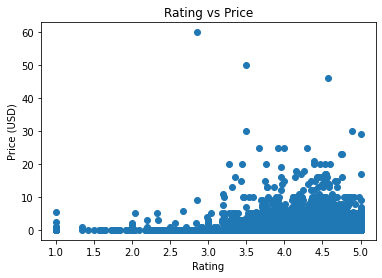

In [17]:
plt.scatter(game_df['Rating'], game_df['Price'])
plt.xlabel("Rating")
plt.ylabel("Price (USD)")
plt.title("Rating vs Price")



plt.show()

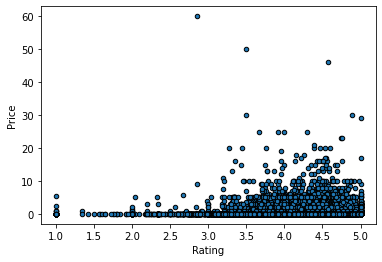

In [18]:
game_df.plot.scatter(x = 'Rating', y = 'Price', edgecolor = 'k')

The r-value is: 0.02214569101156536


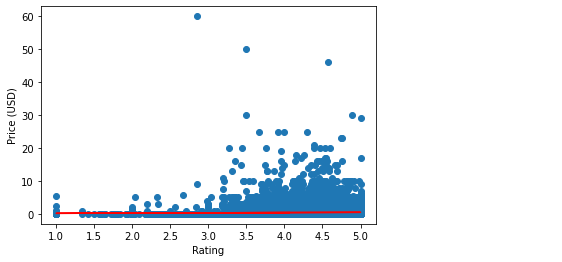

In [19]:
#Is there a correlation between game price and rating?

x_values = game_df['Rating']
y_values = game_df['Price']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Rating')
plt.ylabel('Price (USD)')

print(f"The r-value is: {rvalue}")

plt.show()

In [20]:
rating = game_df.iloc[:, 3]
price = game_df.iloc[:,6]
correlation = st.pearsonr(rating, price)
print (f'The correlation between both factors is {round(correlation[0],2)}')

The correlation between both factors is 0.02


## Installs and Game Price

In [21]:
game_df['Installs'] = game_df['Installs'].str.replace('+', '')
game_df['Installs'] = game_df['Installs'].str.replace(',', '')
#game_df['Installs'] = game_df['Installs'].astype(int)

C:\Users\britt\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\britt\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
game_df['Installs'].value_counts()

100000        3420
1000000       3204
10000         2941
1000          2264
500000        1565
50000         1340
100           1340
5000          1208
10000000      1183
5000000       1045
500            794
10             503
50             393
50000000       169
100000000       87
5               78
1               49
500000000        5
0                5
1000000000       1
Name: Installs, dtype: int64

In [23]:
game_df['Installs'] = game_df['Installs'].astype(int)

C:\Users\britt\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
game_df = game_df.sort_values(by = ['Installs'], ascending = True)
game_df

,App Name,Category,Sub Category,Rating,Reviews,Installs,Price,Content Rating,Last Updated
14023,Best Air Hunter,GAME,ACTION,5.000000,24.0,0,0.0,Everyone,6-Mar-19
5733,Bubble Shooter,GAME,PUZZLE,4.130435,23.0,0,0.0,Everyone,23-Oct-18
7655,Vadaa Hunt,GAME,CASUAL,2.333333,3.0,0,0.0,Everyone,5-Dec-18
17545,RC Bot,GAME,EDUCATIONAL,3.000000,4.0,0,0.0,Everyone,1-Nov-18
14542,4 Only Jotto: The 4 Letter Logic Word Game,GAME,WORD,5.000000,1.0,0,0.0,Everyone,20-Jan-19
...,...,...,...,...,...,...,...,...,...
384,Pou,GAME,CASUAL,4.330340,10752323.0,500000000,0.0,Everyone,25-May-18
538,Temple Run 2,GAME,ACTION,4.329189,8612822.0,500000000,0.0,Everyone,27-Mar-19
862,Hill Climb Racing,GAME,RACING,4.440125,9257863.0,500000000,0.0,Everyone,19-Mar-19
628,My Talking Tom,GAME,CASUAL,4.491666,15569249.0,500000000,0.0,Everyone,2-Apr-19


In [25]:
game_df['Installs'] = game_df['Installs'].astype(str)

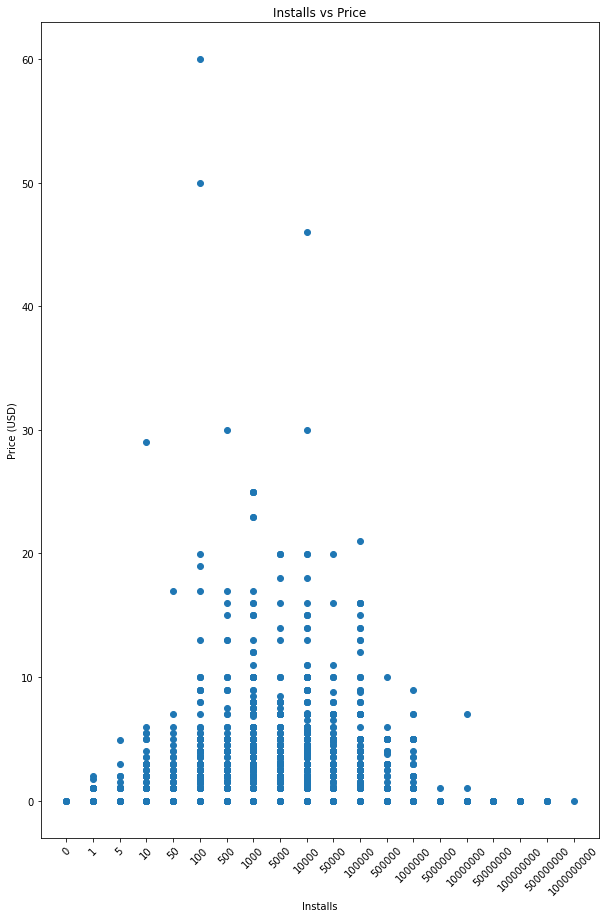

In [26]:
plt.figure(figsize = (10,15))
plt.scatter(game_df['Installs'], game_df['Price'])
plt.xlabel("Installs")
plt.ylabel("Price (USD)")
plt.title("Installs vs Price")
plt.xticks(rotation=45) 




plt.show()

In [27]:
game_df['Installs'] = game_df['Installs'].astype(int)

In [28]:
#dropping outliers for linear regression
game_outliers = game_df.loc[game_df['Installs'] >= 400000000]
game_df 
#top 6 games with the most installs

,App Name,Category,Sub Category,Rating,Reviews,Installs,Price,Content Rating,Last Updated
14023,Best Air Hunter,GAME,ACTION,5.000000,24.0,0,0.0,Everyone,6-Mar-19
5733,Bubble Shooter,GAME,PUZZLE,4.130435,23.0,0,0.0,Everyone,23-Oct-18
7655,Vadaa Hunt,GAME,CASUAL,2.333333,3.0,0,0.0,Everyone,5-Dec-18
17545,RC Bot,GAME,EDUCATIONAL,3.000000,4.0,0,0.0,Everyone,1-Nov-18
14542,4 Only Jotto: The 4 Letter Logic Word Game,GAME,WORD,5.000000,1.0,0,0.0,Everyone,20-Jan-19
...,...,...,...,...,...,...,...,...,...
384,Pou,GAME,CASUAL,4.330340,10752323.0,500000000,0.0,Everyone,25-May-18
538,Temple Run 2,GAME,ACTION,4.329189,8612822.0,500000000,0.0,Everyone,27-Mar-19
862,Hill Climb Racing,GAME,RACING,4.440125,9257863.0,500000000,0.0,Everyone,19-Mar-19
628,My Talking Tom,GAME,CASUAL,4.491666,15569249.0,500000000,0.0,Everyone,2-Apr-19


In [29]:
game_df = game_df.loc[game_df['Installs'] <= 400000000]

In [30]:
game_df['Installs'] = game_df['Installs'].astype(str)
game_df

C:\Users\britt\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,App Name,Category,Sub Category,Rating,Reviews,Installs,Price,Content Rating,Last Updated
14023,Best Air Hunter,GAME,ACTION,5.000000,24.0,0,0.0,Everyone,6-Mar-19
5733,Bubble Shooter,GAME,PUZZLE,4.130435,23.0,0,0.0,Everyone,23-Oct-18
7655,Vadaa Hunt,GAME,CASUAL,2.333333,3.0,0,0.0,Everyone,5-Dec-18
17545,RC Bot,GAME,EDUCATIONAL,3.000000,4.0,0,0.0,Everyone,1-Nov-18
14542,4 Only Jotto: The 4 Letter Logic Word Game,GAME,WORD,5.000000,1.0,0,0.0,Everyone,20-Jan-19
...,...,...,...,...,...,...,...,...,...
1209,FIFA Soccer,GAME,SPORTS,4.254403,5230640.0,100000000,0.0,Everyone,26-Mar-19
511,Dragon City,GAME,SIMULATION,4.583171,6872215.0,100000000,0.0,Everyone,27-Mar-19
216,Shadow Fight 2,GAME,ACTION,4.648891,11871704.0,100000000,0.0,Everyone 10+,2-Apr-19
1203,Dream League Soccer 2019,GAME,SPORTS,4.586694,11504048.0,100000000,0.0,Everyone,14-Mar-19


In [32]:
game_df['Price'].value_counts()

0.00     18889
0.99       570
2.99       472
1.99       463
4.99       345
         ...  
1.70         1
2.77         1
1.09         1
28.99        1
3.90         1
Name: Price, Length: 101, dtype: int64

The r-value is: -0.04751133842385168


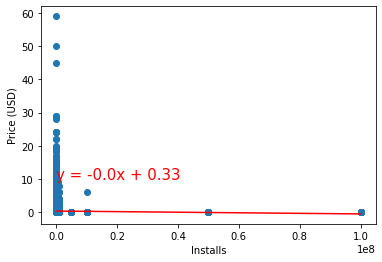

In [31]:
x_values = game_df['Installs'].astype('int64')
y_values = game_df['Price'].astype('int64')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Installs')
plt.ylabel('Price (USD)')

print(f"The r-value is: {rvalue}")

plt.show()